In [29]:
import pandas as pd 
import matplotlib.pyplot as plt
import pickle
import json

In [4]:
# trips.txt: there are multiple trips per shuttle

df_trips = pd.read_csv('./passio-go/public/google_transit/trips.txt')
df_trips

,route_id,service_id,trip_id,trip_headsign,trip_short_name,direction_id,block_id,shape_id,wheelchair_accessible,bikes_allowed
0,777,48686.126106,670294,NaN,NaN,NaN,23714,48686,0,0
1,777,48686.126106,670295,NaN,NaN,NaN,23714,48686,0,0
2,777,48686.126106,670296,NaN,NaN,NaN,23714,48686,0,0
3,777,48686.126106,670297,NaN,NaN,NaN,23714,48686,0,0
4,777,48686.126106,670298,NaN,NaN,NaN,23714,48686,0,0
...,...,...,...,...,...,...,...,...,...,...
333,5707,48152.126137,670590,SEC Express,NaN,NaN,23728,48700,0,0
334,5707,48152.124657,670598,SEC Express,NaN,NaN,23727,48700,0,0
335,5707,48152.124657,670599,SEC Express,NaN,NaN,23727,48700,0,0
336,5707,48152.124657,670600,SEC Express,NaN,NaN,23728,48700,0,0


In [10]:
# shapes.txt: points that make the routes
df_shapes = pd.read_csv('./google_transit/shapes.txt')
df_shapes

,shape_id,shape_pt_lat,shape_pt_lon,shape_pt_sequence
0,48686,42.381867,-71.125325,1
1,48686,42.380436,-71.124350,2
2,48686,42.380421,-71.124387,3
3,48686,42.380187,-71.124944,4
4,48686,42.380167,-71.124994,5
...,...,...,...,...
5619,48700,42.362642,-71.124582,285
5620,48700,42.362604,-71.124607,286
5621,48700,42.362566,-71.124630,287
5622,48700,42.362443,-71.124688,288


In [39]:
# dump the coordinates for each route into a individual json files as nested lists: [[x1, y1], [x2, y2], ...]
'''
route_1.txt: allston loop
route_2.txt: quad sec
route_3.txt: quad yard express
'''
# unique_shape_ids = list(set(df_shapes['shape_id']))
wanted_ids = [48152, 48168, 48166] # allston_loop, quad_sec, quad_express

count = 0
for id in wanted_ids:
    shape = df_shapes[df_shapes['shape_id']==id]
    lat = list(shape['shape_pt_lat'])
    long = list(shape['shape_pt_lon'])
    coords_list = []

    for index in range(len(lat)):
        x_coord = lat[index]
        y_coord = long[index]
        coords_list.append([x_coord, y_coord])
        # plt.plot(lat, long)
    # print(coords_list)
    count += 1
    with open(f'./routes/route_{count}.json', 'w') as f:
        json.dump(coords_list, f)

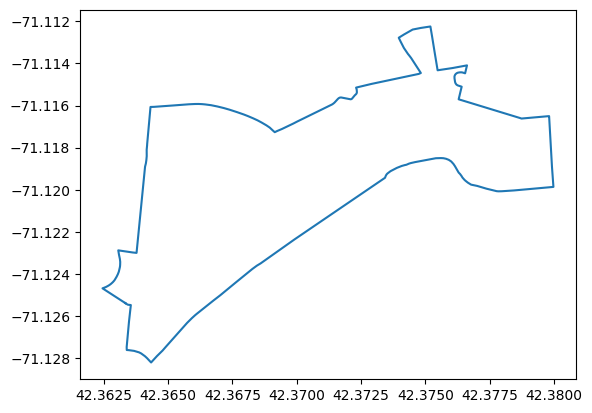

In [37]:
shape = df_shapes[df_shapes['shape_id']==48152]
lat = list(shape['shape_pt_lat'])
long = list(shape['shape_pt_lon'])
plt.plot(lat, long)

In [44]:
live_pos = open('./passio-go/public/live_files/vehiclePositions.json')
live_pos = json.load(live_pos)

In [47]:
live_pos.keys()

dict_keys(['header', 'entity'])

In [50]:
live_pos['header']

{'gtfs_realtime_version': '2.0', 'incrementality': 0, 'timestamp': 1708982484}

In [80]:
# live_pos['entity']: list of dictionarys, where each dict corresponds to a bus's current position information
live_pos['entity'][1]['vehicle']

{'vehicle': {'id': '2884', 'label': '206'},
 'position': {'latitude': 42.38051,
  'longitude': -71.1243845,
  'speed': 2.52,
  'bearing': 226},
 'current_stop_sequence': 8,
 'stop_id': '23509',
 'timestamp': 1708982480,
 'trip': {'trip_id': '670551'}}

In [57]:
'''
Given one dict:
    match 'trip_id' in trips.txt to get 'route_id' 
    match 'route_id' in routes.txt to only get routes [778, 2235, 790], [allston look, quad sec, quad express]
'''
df_trips = pd.read_csv('./passio-go/public/google_transit/trips.txt')
df_routes = pd.read_csv('./passio-go/public/google_transit/routes.txt')

In [61]:
df_routes[df_routes['route_short_name']=='AL']

,route_id,agency_id,route_short_name,route_long_name,route_type,route_color,route_text_color
1,778,831,AL,Allston Loop,3,A50606,FFFFFF


In [63]:
df_routes[df_routes['route_short_name']=='QSEC']

,route_id,agency_id,route_short_name,route_long_name,route_type,route_color,route_text_color
14,2235,831,QSEC,Quad SEC Direct,3,9467BD,FFFFFF


In [64]:
df_routes[df_routes['route_short_name']=='QE']

,route_id,agency_id,route_short_name,route_long_name,route_type,route_color,route_text_color
13,790,831,QE,Quad Express,3,136D1C,FFFFFF


In [79]:
# route_id 778: AL
# route_id 2235: QSEC
# route_id 790: QE

routes_of_interest = [778, 2235, 790]
trips_per_route = {}
routes_of_interest_df = df_trips[df_trips['route_id'].apply(lambda x: x in routes_of_interest)] # 136 trips that are either AL, QSEC, or QE

for route_id in routes_of_interest:
    trips_list = list(df_trips[df_trips['route_id']==route_id]['trip_id'].apply(lambda x: int(x)))
    trips_per_route[route_id] = trips_list

with open('trips_per_route.json', 'w') as f:
    json.dump(trips_per_route, f)